### check params of the swot pixc data

In [19]:
import os
import xarray as xr
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from utils.swot_data_mask import swot_pixc_mask


In [ ]:
dir_pixc = 'data/dianchi-lake/pixc'
path_lake_vec = 'data/dianchi-lake/dianchi_vector.gpkg'


In [21]:
## read vector file of the lake.
lake_gpd = gpd.read_file(path_lake_vec).to_crs(epsg=4326)
lake_gpd


,Name,geometry
0,dianchi,"POLYGON Z ((102.66614 24.83805 0.00000, 102.65..."


In [22]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_pixc, file) for file in os.listdir(dir_pixc) if 'PIXC_' in file and 'masked' not in file]
paths_file = sorted(paths_file)
print(len(paths_file))


9


In [23]:
file_id = 3
path_file = paths_file[file_id]
pixc_nc = xr.open_dataset(path_file, group='pixel_cloud')
pixc_nc

<xarray.Dataset>
Dimensions:                                (points: 4737290, complex_depth: 2,
                                            num_pixc_lines: 3282)
Coordinates:
    latitude                               (points) float64 ...
    longitude                              (points) float64 ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 ...
    range_index                            (points) float64 ...
    interferogram                          (points, complex_depth) float32 ...
    power_plus_y                           (points) float32 ...
    power_minus_y                          (points) float32 ...
    coherent_power                         (points) float32 ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 ...
    data_window_first_valid                (num_pixc_lines) float64 ...
    data_window_last_valid                 (num_pixc_lines) float64 ...
    data_window_first_cross_track          (num_pixc_lines) float32 ...
    data_window_last_cross_track           (num_pixc_lines) float32 ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5016
    looks_to_efflooks:           1.5529848257785055
    num_azimuth_looks:           7.0
    azimuth_offset:              4

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
# ax1
scat1 = ax[0].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.height,
           s=0.1, edgecolor='none', cmap='jet', clim=(1700, 2000))
lake_gpd.plot(ax=ax[0], edgecolor='Brown', facecolor='none', linewidth=1)

# ax2
scat2 = ax[1].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.geolocation_qual,
           s=0.1, edgecolor='none', cmap='jet')
lake_gpd.plot(ax=ax[1], edgecolor='Brown', facecolor='none', linewidth=1)

fig.colorbar(scat1, ax=ax[0]).set_label('height (m)')
fig.colorbar(scat2, ax=ax[1]).set_label('geolocation quality')


In [ ]:
pixc_masked_nc = swot_pixc_mask(pixc_nc=pixc_nc, region_gpd=lake_gpd)
pixc_masked_nc


<xarray.Dataset>
Dimensions:           (points: 283516)
Coordinates:
    latitude          (points) float64 24.67 24.67 24.67 ... 24.96 24.96 24.96
    longitude         (points) float64 102.6 102.6 102.6 ... 102.6 102.6 102.6
Dimensions without coordinates: points
Data variables:
    height            (points) float32 1.889e+03 1.855e+03 ... 1.855e+03
    solid_earth_tide  (points) float32 ...
    pole_tide         (points) float32 ...
    load_tide_fes     (points) float32 ...
    iono_cor_gim_ka   (points) float32 ...
    geoid             (points) float32 ...
    pixel_area        (points) float32 ...
    geolocation_qual  (points) float64 5.244e+05 68.0 5.244e+05 ... 68.0 68.0
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5016
    looks_to_efflooks:           1.5529848257785055
    num_azimuth_looks:           7.0
    azimuth_offset:              4

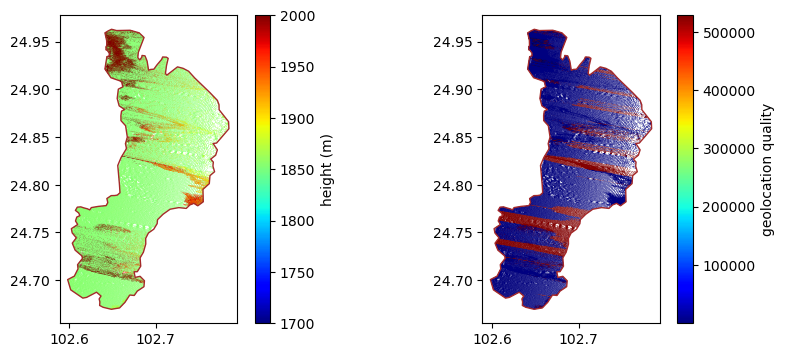

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
# ax1
scat1 = ax[0].scatter(x=pixc_masked_nc.longitude, y=pixc_masked_nc.latitude, c=pixc_masked_nc.height,
           s=0.1, edgecolor='none', cmap='jet', clim=(1700, 2000))
lake_gpd.plot(ax=ax[0], edgecolor='Brown', facecolor='none', linewidth=1)
# ax2
scat2 = ax[1].scatter(x=pixc_masked_nc.longitude, y=pixc_masked_nc.latitude, c=pixc_masked_nc.geolocation_qual,
           s=0.1, edgecolor='none', cmap='jet')
lake_gpd.plot(ax=ax[1], edgecolor='Brown', facecolor='none', linewidth=1)
fig.colorbar(scat1, ax=ax[0]).set_label('height (m)')
fig.colorbar(scat2, ax=ax[1]).set_label('geolocation quality')

